In [1]:
import psycopg2

conn = psycopg2.connect(
    database="postgres",
    user='postgres',
    password='joseluis1',
    host='localhost',
    port= '5432'
    )
print("Connecting to Database")
cur = conn.cursor()

cur.execute("""CREATE TABLE public.fraudes(
Monthh text,	
WeekOfMonth int,
DayOfWeek	text,
Make	text,
AccidentArea    text,	
DayOfWeekClaimed	text,
MonthClaimed	text,
WeekOfMonthClaimed  int,
Sex text,
MaritalStatus   text,	
Age	int,
Fault	text,
PolicyType	text,
VehicleCategory	text,
VehiclePrice	text,
FraudFound_P	int,
PolicyNumber	int,
RepNumber	int,
Deductible	int,
DriverRating	int,
Days_Policy_Accident	text,
Days_Policy_Claim	text,
PastNumberOfClaims	text,
AgeOfVehicle	text,
AgeOfPolicyHolder	text,
PoliceReportFiled	text,
WitnessPresent	text,
AgentType	text,
NumberOfSuppliments	   text,
AddressChange_Claim text,
NumberOfCars	text,
Yearr   int,
BasePolicy  text 
)
 """)

print("Columns were created")

with open('C:/Users/JOSE CV/Downloads/PruebaDS_R5/data/fraud.csv', 'r') as f:
    next(f)
    cur.copy_from(f, 'fraudes', sep=',')

print("Data Imported")
conn.commit()
conn.close()


Connecting to Database


In [6]:
import psycopg2
conn = psycopg2.connect(
    database="postgres",
    user='postgres',
    password='joseluis1',
    host='localhost',
    port= '5432'
    )
conn.autocommit = True
cursor = conn.cursor()
postgreSQL_select_Query = '''WITH avg_data AS (
SELECT 
monthh, weekofmonth,  dayofweek,
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh))*100, 2) AS "percentage_fraud_month",
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh, weekofmonth))*100, 2) AS "percentage_fraud_month_week",
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh, weekofmonth,  dayofweek))*100, 2) AS "percentage_fraud_month_week_day"
FROM public.fraudes)

SELECT 
avg_data.monthh, avg_data.weekofmonth,  avg_data.dayofweek,
ROUND(AVG(avg_data.percentage_fraud_month),2),
ROUND(AVG(avg_data.percentage_fraud_month_week),2),
ROUND(AVG(avg_data.percentage_fraud_month_week_day),2)
FROM avg_data
GROUP BY monthh, weekofmonth,  dayofweek'''
cursor.execute(postgreSQL_select_Query)
conn.commit()
conn.close()

In [8]:
import psycopg2
conn = psycopg2.connect(
    database="postgres",
    user='postgres',
    password='joseluis1',
    host='localhost',
    port= '5432'
    )
conn.autocommit = True
cursor = conn.cursor()
postgreSQL_select_Query = '''SELECT monthh, weekofmonth,  dayofweek,
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh))*100, 2) AS "percentage_fraud_month",
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh, weekofmonth))*100, 2) AS "percentage_fraud_month_week",
ROUND((AVG(FraudFound_P) OVER (PARTITION BY monthh, weekofmonth,  dayofweek))*100, 2) AS "percentage_fraud_month_week_day",
ROW_NUMBER() OVER(PARTITION BY monthh, weekofmonth,  dayofweek) AS "ROW"
FROM public.abstable2'''
cursor.execute(postgreSQL_select_Query)
conn.commit()
conn.close()

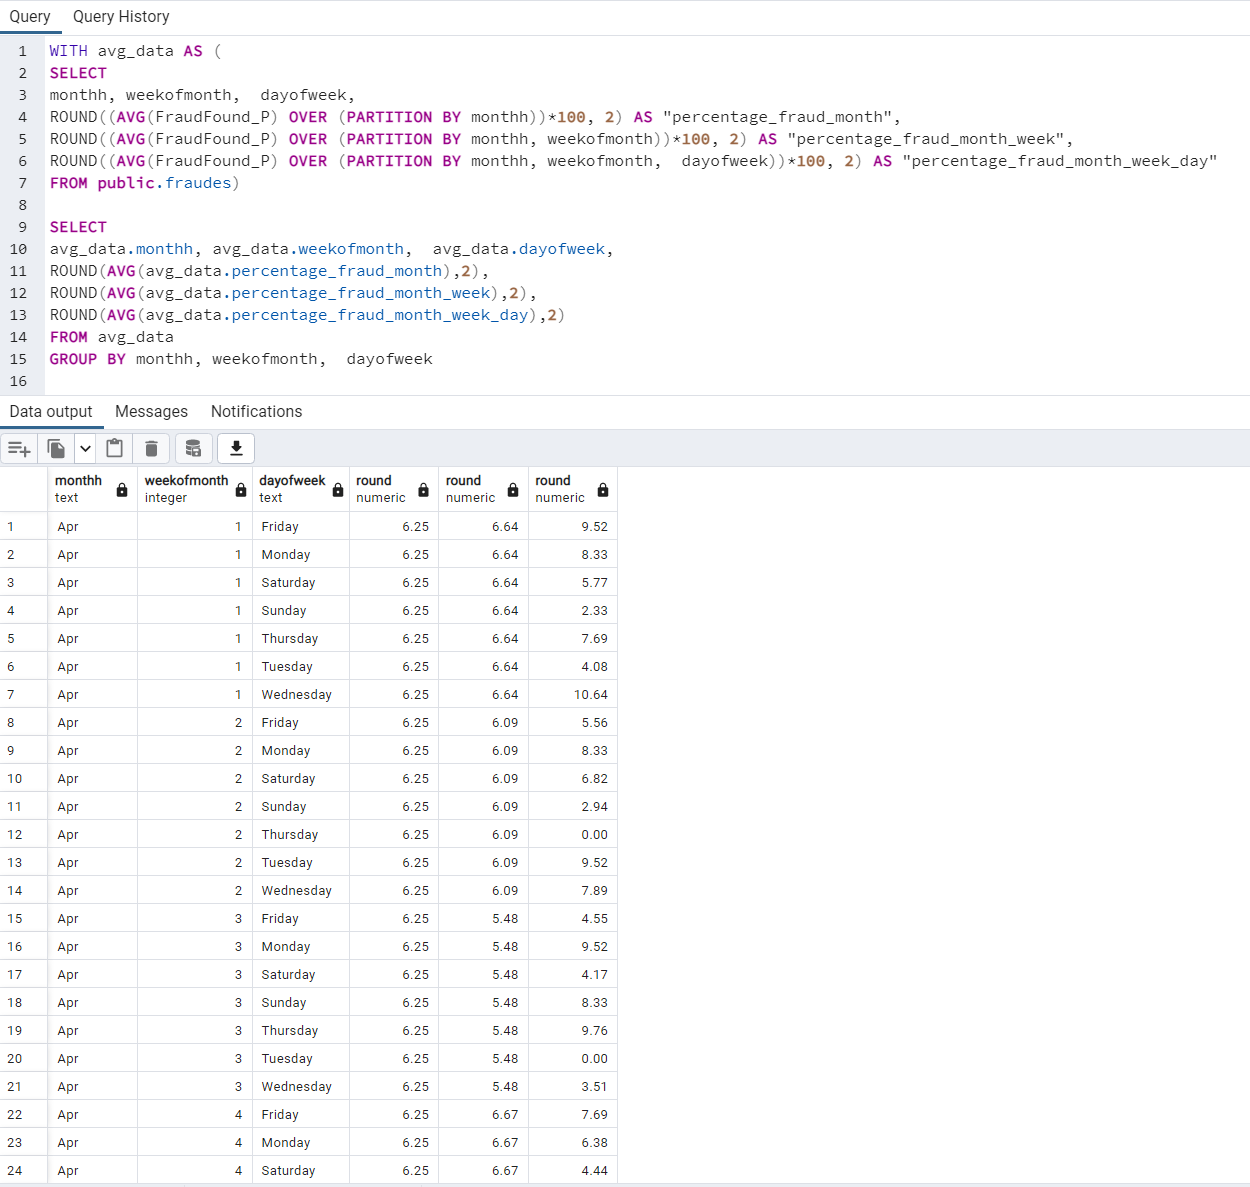